In [1]:
import cv2

In [17]:
img=cv2.imread('first.jpg')

In [19]:
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
img.shape

(683, 1023, 3)

In [15]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [20]:
cv2.imshow('webcam',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
gray.shape

(683, 1023)

In [29]:
type(gray[0][0])

numpy.uint8

In [34]:
hs= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('window 1',hs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
hs.shape

(683, 1023, 3)

In [39]:
vid = cv2.VideoCapture('video.mp4')
while True:
    try:
        _,frame= vid.read()
        cv2.imshow('window2',frame)
    except :
        pass
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

In [42]:
img[0]

array([[237, 234, 230],
       [238, 235, 231],
       [236, 234, 233],
       ...,
       [109, 108, 112],
       [108, 107, 111],
       [108, 107, 111]], dtype=uint8)

# Lect 2

In [2]:
img=cv2.imread('photo.jpg')
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
reImg = cv2.resize(img,(700,500))
cv2.imshow('webcam',reImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
gray= cv2.cvtColor(reImg,cv2.COLOR_BGR2GRAY)
cv2.imshow('webcam',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
canny_img= cv2.Canny(gray,80,80)
cv2.imshow('Ankit',canny_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
import numpy as np
kernel = np.ones((1,3),'uint8')
erode= cv2.erode(canny_img,kernel,iterations=1)
cv2.imshow('Ankit',erode)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
kernel = np.ones((2,2),'uint8')
dilate= cv2.dilate(erode,kernel,iterations=3)
cv2.imshow('Ankit',dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

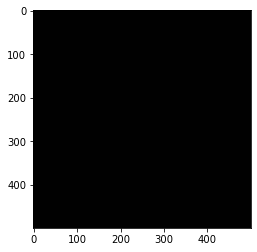

In [30]:
import numpy as np
from matplotlib import pyplot as plt
blank = np.ones((500,500,3),'uint8')
plt.imshow(blank)

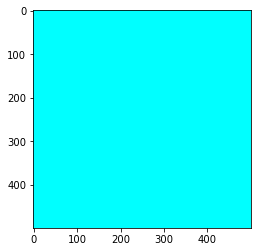

In [33]:
blank[:] = [0,255,255]
plt.imshow(blank)

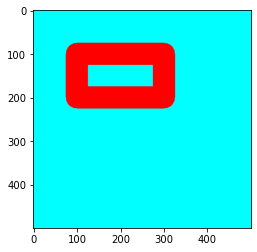

In [18]:
cv2.rectangle(blank,(100,100),(300,200),(255,0,0),50)
plt.imshow(blank)

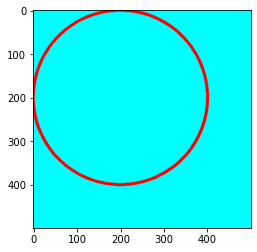

In [34]:
plt.imshow(cv2.circle(blank,(200,200),200,(255,0,0),5))


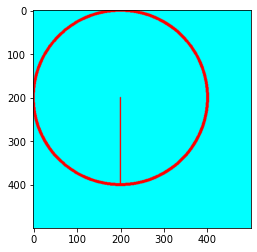

In [23]:
img3=cv2.line(blank,(200,200),(200,400),(255,0,0),2)
plt.imshow(img3)


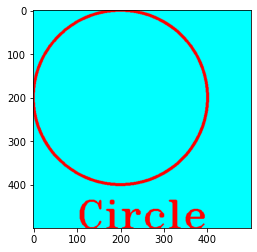

In [35]:
cv2.putText(blank,"Circle",(100,500),cv2.FONT_HERSHEY_TRIPLEX,3,(255,0,0),3)
plt.imshow(blank)

In [39]:
vid = cv2.VideoCapture(0)
while True:
    try:
        _,frame= vid.read()
        cv2.imshow('window2',frame)
    except :
        pass
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

Color Detection

In [16]:
import numpy as np
vid = cv2.VideoCapture(0)
while(1 ) :
    _,frame= vid.read()
    frame = cv2.flip(frame,1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    red_L =np.array([132,85,110],'uint8')
    red_U = np.array([179,250,250],'uint8')
    redM = cv2.inRange(hsv,red_L,red_U)
    kernel = np.ones((5,5),'uint8')
    redM = cv2.dilate(redM,kernel)
    conts,_ = cv2.findContours(redM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cont in conts :
        area = cv2.contourArea(cont)
        if(area>100) :
            x,y,w,h =cv2.boundingRect(cont)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(frame,"Red Color",(x,y),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255))
    cv2.imshow("win1",frame)
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()